### Importing Necessary Libraries and datsets

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits, load_linnerud

# Load datasets
iris = load_iris()
wine = load_wine()
breast_cancer = load_breast_cancer()
digits = load_digits()
linnerud = load_linnerud()

# List of datasets
datasets = [iris, wine, breast_cancer, digits, linnerud]


### Part 2: Confusion Matrix and Accuracy Calculation

In [14]:
# Part A: Confusion matrix and accuracy for each dataset
results_dt = []
results_nb = []

for dataset in datasets:
    if dataset == linnerud:
        X = dataset.data
        y = dataset.target[:, 0]  # Use the first target as the classification target
    else:
        X = dataset.data
        y = dataset.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Decision Tree
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    y_pred_dt = dt_classifier.predict(X_test)
    conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    results_dt.append(accuracy_dt)
    
    print(f"Decision Tree Confusion Matrix for {dataset['DESCR'].splitlines()[0]}:\n", conf_matrix_dt)
    print(f"Decision Tree Accuracy for {dataset['DESCR'].splitlines()[0]}: {accuracy_dt}")

    # Naive Bayes
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)
    y_pred_nb = nb_classifier.predict(X_test)
    conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    results_nb.append(accuracy_nb)
    
    print(f"Naive Bayes Confusion Matrix for {dataset['DESCR'].splitlines()[0]}:\n", conf_matrix_nb)
    print(f"Naive Bayes Accuracy for {dataset['DESCR'].splitlines()[0]}: {accuracy_nb}")


Decision Tree Confusion Matrix for .. _iris_dataset::
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Decision Tree Accuracy for .. _iris_dataset:: 1.0
Naive Bayes Confusion Matrix for .. _iris_dataset::
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Naive Bayes Accuracy for .. _iris_dataset:: 0.9777777777777777
Decision Tree Confusion Matrix for .. _wine_dataset::
 [[17  2  0]
 [ 0 21  0]
 [ 1  0 13]]
Decision Tree Accuracy for .. _wine_dataset:: 0.9444444444444444
Naive Bayes Confusion Matrix for .. _wine_dataset::
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
Naive Bayes Accuracy for .. _wine_dataset:: 1.0
Decision Tree Confusion Matrix for .. _breast_cancer_dataset::
 [[59  4]
 [11 97]]
Decision Tree Accuracy for .. _breast_cancer_dataset:: 0.9122807017543859
Naive Bayes Confusion Matrix for .. _breast_cancer_dataset::
 [[ 57   6]
 [  4 104]]
Naive Bayes Accuracy for .. _breast_cancer_dataset:: 0.9415204678362573
Decision Tree Confusion Matrix for .. _digits_dataset::
 [[48  0  1  0  1  1  0  0  1  1]
 [ 0 3

### Part 3: AUROC Plots and Accuracy Comparison Graphs

c:\Users\Saurav\ML_Learning\venv\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Saurav\ML_Learning\venv\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Saurav\ML_Learning\venv\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Saurav\ML_Learning\venv\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Saurav\ML_Learning\venv\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Us

IndexError: index 12 is out of bounds for axis 1 with size 12

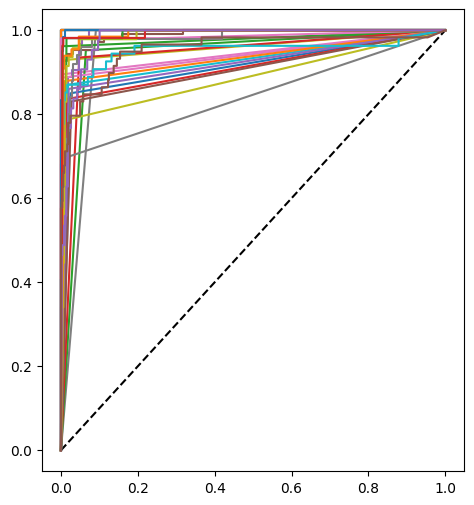

In [15]:
# Part B: AUROC plots and comparison graphs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--')

for i, dataset in enumerate(datasets):
    if dataset == linnerud:
        X = dataset.data
        y = dataset.target[:, 0]  # Use the first target as the classification target
    else:
        X = dataset.data
        y = dataset.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Decision Tree
    dt_classifier.fit(X_train, y_train)
    y_scores_dt = dt_classifier.predict_proba(X_test)  # Get probabilities for all classes

    # Compute ROC curve for each class
    for class_index in range(len(np.unique(y))):
        fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt[:, class_index], pos_label=class_index)
        roc_auc_dt = auc(fpr_dt, tpr_dt)
        plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree {dataset["DESCR"].splitlines()[0]} Class {class_index} (AUC = {roc_auc_dt:.2f})')

    # Naive Bayes
    nb_classifier.fit(X_train, y_train)
    y_scores_nb = nb_classifier.predict_proba(X_test)  # Get probabilities for all classes

    # Compute ROC curve for each class
    for class_index in range(len(np.unique(y))):
        fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb[:, class_index], pos_label=class_index)
        roc_auc_nb = auc(fpr_nb, tpr_nb)
        plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes {dataset["DESCR"].splitlines()[0]} Class {class_index} (AUC = {roc_auc_nb:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_dt, label='Decision Tree Accuracy', marker='o')
plt.plot(results_nb, label='Naive Bayes Accuracy', marker='o')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.xticks(ticks=np.arange(len(datasets)), labels=[dataset['DESCR'].splitlines()[0] for dataset in datasets], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Part 4: K-Fold Cross Validation and Ensemble Models

In [ ]:
# Part C: K-Fold Cross Validation and Ensemble Models
kf = KFold(n_splits=5)

# Store cross-validation scores
cv_scores_dt = []
cv_scores_nb = []

for dataset in datasets:
    if dataset == linnerud:
        X = dataset.data
        y = dataset.target[:, 0]  # Use the first target as the classification target
    else:
        X = dataset.data
        y = dataset.target

    # Decision Tree Cross Validation
    dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=kf)
    cv_scores_dt.append(dt_cv_scores)

    # Naive Bayes Cross Validation
    nb_cv_scores = cross_val_score(nb_classifier, X, y, cv=kf)
    cv_scores_nb.append(nb_cv_scores)

# Print cross-validation scores
for i, dataset in enumerate(datasets):
    print(f"Decision Tree Cross-Validation Scores for {dataset['DESCR'].splitlines()[0]}: {cv_scores_dt[i]}")
    print(f"Naive Bayes Cross-Validation Scores for {dataset['DESCR'].splitlines()[0]}: {cv_scores_nb[i]}")

# Ensemble model example (Voting Classifier)
from sklearn.ensemble import VotingClassifier

# Using the last dataset as an example for the voting classifier
X = datasets[-1].data
y = datasets[-1].target[:, 0]  # Use the first target as the classification target for Linnerud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

voting_classifier = VotingClassifier(estimators=[('dt', dt_classifier), ('nb', nb_classifier)], voting='soft')
voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)

conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print("Voting Classifier Confusion Matrix:\n", conf_matrix_voting)
print("Voting Classifier Accuracy:", accuracy_voting)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits

# Load datasets
iris = load_iris()
wine = load_wine()
breast_cancer = load_breast_cancer()
digits = load_digits()

# Assuming you download the Wine Quality dataset from UCI and save it as 'winequality-red.csv'
wine_quality = pd.read_csv('winequality-red.csv')

# List of datasets
datasets = [iris, wine, breast_cancer, digits]

# Part A: Confusion matrix and accuracy for each dataset
for dataset in datasets:
    X = dataset.data
    y = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Decision Tree
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    y_pred_dt = dt_classifier.predict(X_test)
    conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Decision Tree Confusion Matrix for {dataset.name}:\n", conf_matrix_dt)
    print(f"Decision Tree Accuracy for {dataset.name}: {accuracy_dt}")

    # Naive Bayes
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)
    y_pred_nb = nb_classifier.predict(X_test)
    conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    print(f"Naive Bayes Confusion Matrix for {dataset.name}:\n", conf_matrix_nb)
    print(f"Naive Bayes Accuracy for {dataset.name}: {accuracy_nb}")



Decision Tree Confusion Matrix for .. _iris_dataset::
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Decision Tree Accuracy for .. _iris_dataset:: 1.0
Naive Bayes Confusion Matrix for .. _iris_dataset::
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Naive Bayes Accuracy for .. _iris_dataset:: 0.9777777777777777
Decision Tree Confusion Matrix for .. _wine_dataset::
 [[17  2  0]
 [ 0 21  0]
 [ 1  0 13]]
Decision Tree Accuracy for .. _wine_dataset:: 0.9444444444444444
Naive Bayes Confusion Matrix for .. _wine_dataset::
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
Naive Bayes Accuracy for .. _wine_dataset:: 1.0
Decision Tree Confusion Matrix for .. _breast_cancer_dataset::
 [[60  3]
 [ 9 99]]
Decision Tree Accuracy for .. _breast_cancer_dataset:: 0.9298245614035088
Naive Bayes Confusion Matrix for .. _breast_cancer_dataset::
 [[ 57   6]
 [  4 104]]
Naive Bayes Accuracy for .. _breast_cancer_dataset:: 0.9415204678362573
Decision Tree Confusion Matrix for .. _digits_dataset::
 [[47  0  1  0  2  1  1  0  0  1]
 [ 0 3

ValueError: multiclass format is not supported

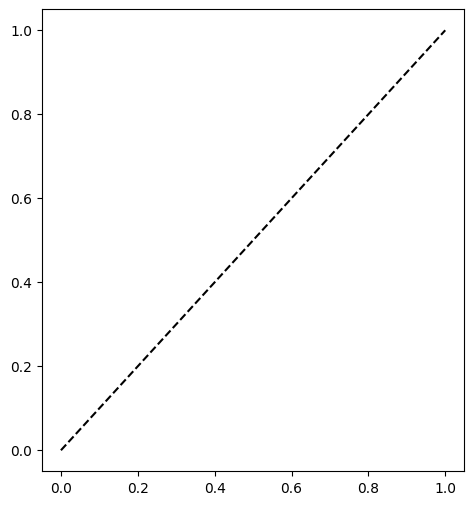

In [ ]:
# Part B: AUROC plots and comparison graphs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--')

for i, dataset in enumerate(datasets):
    if dataset == linnerud:
        X = dataset.data
        y = dataset.target[:, 0]  # Use the first target as the classification target
    else:
        X = dataset.data
        y = dataset.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Decision Tree
    dt_classifier.fit(X_train, y_train)
    y_scores_dt = dt_classifier.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree {dataset["DESCR"].splitlines()[0]} (AUC = {roc_auc_dt:.2f})')

    # Naive Bayes
    nb_classifier.fit(X_train, y_train)
    y_scores_nb = nb_classifier.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb)
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes {dataset["DESCR"].splitlines()[0]} (AUC = {roc_auc_nb:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_dt, label='Decision Tree Accuracy', marker='o')
plt.plot(results_nb, label='Naive Bayes Accuracy', marker='o')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.xticks(ticks=np.arange(len(datasets)), labels=[dataset['DESCR'].splitlines()[0] for dataset in datasets], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Part C: K-Fold Cross Validation and Ensemble Models
kf = KFold(n_splits=5)

# Store cross-validation scores
cv_scores_dt = []
cv_scores_nb = []

for dataset in datasets:
    if dataset == linnerud:
        X = dataset.data
        y = dataset.target[:, 0]  # Use the first target as the classification target
    else:
        X = dataset.data
        y = dataset.target

    # Decision Tree Cross Validation
    dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=kf)
    cv_scores_dt.append(dt_cv_scores)

    # Naive Bayes Cross Validation
    nb_cv_scores = cross_val_score(nb_classifier, X, y, cv=kf)
    cv_scores_nb.append(nb_cv_scores)

# Print cross-validation scores
for i, dataset in enumerate(datasets):
    print(f"Decision Tree Cross-Validation Scores for {dataset['DESCR'].splitlines()[0]}: {cv_scores_dt[i]}")
    print(f"Naive Bayes Cross-Validation Scores for {dataset['DESCR'].splitlines()[0]}: {cv_scores_nb[i]}")

# Ensemble model example (Voting Classifier)
from sklearn.ensemble import VotingClassifier

# Using the last dataset as an example for the voting classifier
X = datasets[-1].data
y = datasets[-1].target[:, 0]  # Use the first target as the classification target for Linnerud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

voting_classifier = VotingClassifier(estimators=[('dt', dt_classifier), ('nb', nb_classifier)], voting='soft')
voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)

conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print("Voting Classifier Confusion Matrix:\n", conf_matrix_voting)
print("Voting Classifier Accuracy:", accuracy_voting)